BouNDING BOX  -> LABELME LIBRARY

PIPELINE
1.install dependencies
2.collect images using open cv


In [1]:
!pip install labelme

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.5 MB 991.0 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.5 MB 1.8 MB/s eta 0:00:01
     --------- ------------------------------ 0.3/1.5 MB 2.6 MB/s eta 0:00:01
     -------------------- ------------------- 0.7/1.5 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 6.7 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for imgviz>=0.11 from https://files.pythonhosted.org/packages/20/23/ec40e1bc6b83ae33970ba9e9a6622d1b1f4357a3ff2b1fb5d87b0445ffa5/imgviz-1.7.4-py3-none-any.whl.metadata
  Obtaining dependency information for natsort>=7.1.0 from https://files.pyt

In [1]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for albumentations from https://files.pythonhosted.org/packages/9b/f6/c486cedb4f75147232f32ec4c97026714cfef7c7e247a1f0427bc5489f66/albumentations-1.3.1-py3-none-any.whl.metadata
  Using cached albumentations-1.3.1-py3-none-any.whl.metadata (34 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Obtaining dependency information for opencv-python-headless>=4.1.1 from https://files.pythonhosted.org/packages/70/78/7a13730745684584db53e8aa3c3bd84beef2dcb32bebf627bda0d6df461e/opencv_python_headless-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.8.0.76-cp37-ab

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\HP\AppData\Local\Temp\pip-install-_pen8jei\tensorflow-gpu_ed0d053ed82c439db1bdad324517c847\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build w

In [6]:
import os
import time
import uuid #uniqueuniformindentifier
import cv2

In [7]:
image_path=os.path.join('data','images')
number_images=20

collecting images from opencv

In [16]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(image_path,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

annotating images

In [1]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\HP\.labelmerc


In [2]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

limit gpu memory growth

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

LOAD IMAGE INTO TF PIPELINE


In [6]:
images=tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

In [7]:
images.as_numpy_iterator().next()

b'data\\images\\79614df8-57d4-11ee-8d9f-a4fc773fd39c.jpg'

In [8]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img
#the map operation in Tensorflow is a way to apply a function to each element of a tensor. The resulting output is a new tensor with the same shape as the input tensor, but with each element transformed according to the function you specify.

In [9]:
images=images.map(load_image)

In [10]:
images.as_numpy_iterator().next()

array([[[255, 253, 255],
        [254, 252, 255],
        [253, 251, 252],
        ...,
        [254, 214, 179],
        [254, 214, 178],
        [254, 214, 178]],

       [[254, 252, 255],
        [254, 252, 255],
        [254, 252, 253],
        ...,
        [254, 214, 179],
        [254, 214, 178],
        [254, 214, 178]],

       [[254, 252, 253],
        [254, 252, 253],
        [254, 252, 253],
        ...,
        [254, 214, 178],
        [254, 214, 178],
        [254, 214, 178]],

       ...,

       [[118, 105,  88],
        [117, 101,  85],
        [115,  96,  81],
        ...,
        [180, 190, 202],
        [178, 188, 200],
        [178, 188, 200]],

       [[113,  97,  82],
        [112,  94,  80],
        [111,  92,  78],
        ...,
        [180, 190, 202],
        [180, 188, 201],
        [179, 187, 200]],

       [[109,  93,  78],
        [109,  91,  77],
        [111,  92,  78],
        ...,
        [180, 190, 202],
        [179, 187, 200],
        [178, 186, 199]]

In [11]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

viewing  raw images

In [12]:
image_generator=images.batch(4).as_numpy_iterator()


In [13]:
plot_images=image_generator.next()

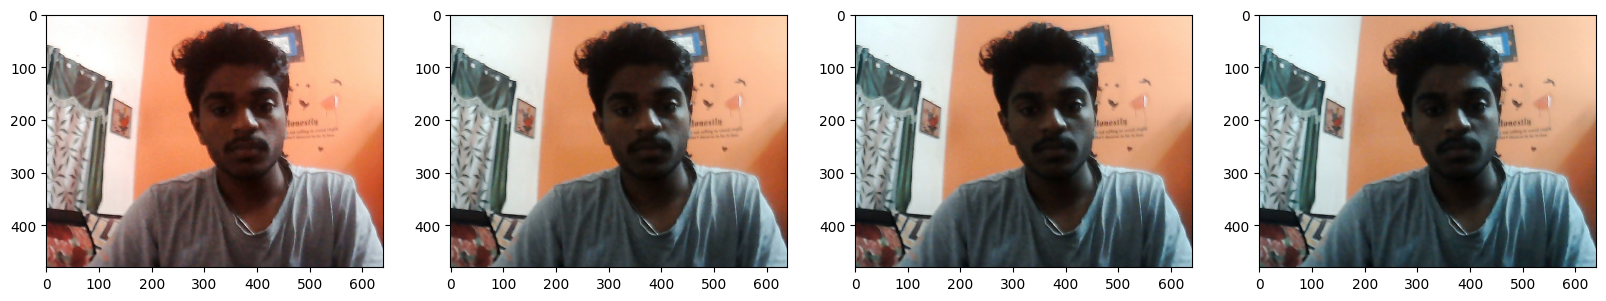

In [15]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

PARTITION UNAUGUMENTED DATA